In [2]:
import mysql.connector
import pandas as pd
mydb = mysql.connector.connect(
     host = "mdsi-dsp-spr-2020.cehiwpryiego.ap-southeast-2.rds.amazonaws.com",
     port = "3306",
     user = "min", ## Change as required
     password = "utsmdsi2020",
     database = "asx")

mycursor = mydb.cursor()
print('Database Open')

Database Open


In [3]:
#join vix index to asx200 index monthly
df = pd.read_sql_query("SELECT * FROM asx.vix where Date > 2004-01-02", con=mydb)
print(df)
df_asx = pd.read_sql_query("SELECT * FROM asx.asx_s_and_p where date > '2004-01-02'", con=mydb)
print(df_asx)
df_comparison = pd.merge(df_asx,df,left_on='date', right_on='Date')
print(df_comparison)

            Date   Open   High    Low  Close
0     2004-01-02  17.96  18.68  17.54  18.22
1     2004-01-05  18.45  18.49  17.44  17.49
2     2004-01-06  17.66  17.67  16.19  16.73
3     2004-01-07  16.72  16.75  15.50  15.50
4     2004-01-08  15.42  15.68  15.32  15.61
...          ...    ...    ...    ...    ...
4206  2020-09-17  28.22  28.92  26.26  26.46
4207  2020-09-18  26.65  28.10  25.28  25.83
4208  2020-09-21  28.04  31.18  27.39  27.78
4209  2020-09-22  28.61  28.78  26.48  26.86
4210  2020-09-23  27.02  29.73  25.19  28.58

[4211 rows x 5 columns]
           date     asx_open  s_and_p_open
0    2004-02-01  3273.199951   1131.130005
1    2004-03-01  3364.800049   1144.939941
2    2004-04-01  3418.699951   1126.209961
3    2004-05-01  3399.000000   1107.300049
4    2004-06-01  3459.300049   1120.680054
..          ...          ...           ...
197  2020-07-01  5897.899902   3105.919922
198  2020-08-01  5927.799805   3288.260010
199  2020-09-01  6060.500000   3507.439941
200  

In [4]:
#select 3 column - date, asx_open and vix close
df_comparison = df_comparison[["date","asx_open","Close"]]
print(df_comparison)

           date     asx_open  Close
0    2004-03-01  3364.800049  14.44
1    2004-04-01  3418.699951  16.65
2    2004-06-01  3459.300049  16.30
3    2004-07-01  3533.000000  15.20
4    2004-09-01  3554.000000  14.91
..          ...          ...    ...
124  2020-04-01  5076.799805  57.06
125  2020-05-01  5522.399902  37.19
126  2020-06-01  5755.700195  28.23
127  2020-07-01  5897.899902  28.62
128  2020-09-01  6060.500000  26.12

[129 rows x 3 columns]


In [5]:
#test correlation of date matched two indexes, cor = -0.27965
import scipy.stats as stats
print(stats.pearsonr(df_comparison.asx_open,df_comparison.Close))

(-0.27965113679101067, 0.001329203137223191)


In [6]:
#test whether correlation is stronger if taking vix month n increase vs. asx month n+1 increase, result is cor = -0.0311
#correlation is close to none
df_comparison["asx_increase"] = (df_comparison.asx_open - df_comparison.asx_open.shift(1))/df_comparison.asx_open.shift(1)
df_comparison["vix_increase"] = (df_comparison.Close.shift(1) - df_comparison.Close.shift(2))/df_comparison.Close.shift(2)
df_comparison = df_comparison.dropna()
print(stats.pearsonr(df_comparison.asx_increase,df_comparison.vix_increase))

(-0.03128848171487414, 0.7269373035360633)


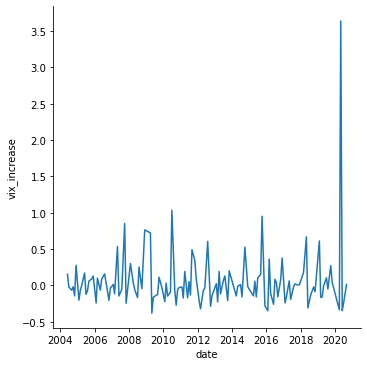

In [7]:
#visualise the two indexex matched by date
import seaborn as sns
sns.relplot(x="date", y="vix_increase", sort=False, kind="line", data=df_comparison)

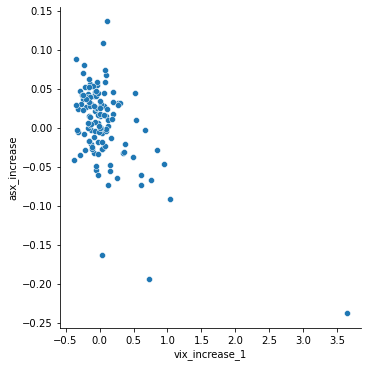

In [13]:
#visualise the asx index increase rate vs. vix index increase rate
df_comparison["vix_increase_1"] = (df_comparison.Close - df_comparison.Close.shift(1))/df_comparison.Close.shift(1)
df_comparison_1 = df_comparison.dropna()
sns.relplot(x="vix_increase_1", y="asx_increase", kind="scatter", data=df_comparison_1)

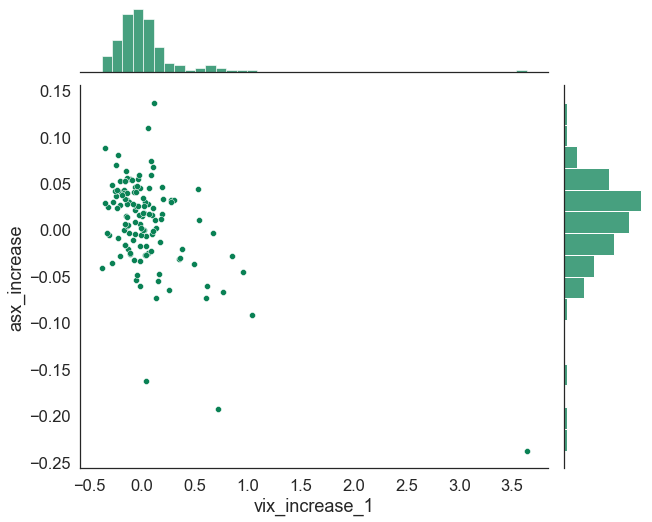

In [14]:
#visualise the scatter and frequency for two indexes
sns.set(style="white",font_scale=1.5)
g = sns.jointplot(x='vix_increase_1', y='asx_increase', data=df_comparison_1,
                 color='#098154',
                 )
g.fig.set_size_inches(10,8)